# Comparing the leaders of online payments: PayPal and Square

In [183]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from pandas.plotting import scatter_matrix
import pandas as pd

# Importing data from Yahoo Finance

In [184]:
# Looking at data in a 6 month time frame
start = datetime.datetime(2020,8,9)
end = datetime.datetime(2021,2,9)

In [185]:
paypal = web.DataReader('PYPL', 'yahoo', start, end)

In [186]:
paypal.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-10,199.850006,191.690002,198.699997,193.320007,8792200,193.320007
2020-08-11,193.535004,186.520004,192.000000,189.029999,9155300,189.029999
2020-08-12,192.509995,189.399994,190.000000,191.320007,7936600,191.320007
2020-08-13,195.130005,191.479996,192.100006,193.070007,10082400,193.070007
2020-08-14,195.468994,190.509995,195.190002,191.460007,4848000,191.460007


In [187]:
paypal.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-03,254.315002,247.389999,253.960007,251.899994,13545700,251.899994
2021-02-04,274.940002,260.850006,265.339996,270.429993,23840900,270.429993
2021-02-05,270.000000,264.709991,268.609985,269.440002,7967200,269.440002
2021-02-08,282.699005,274.623993,276.880005,282.170013,10065500,282.170013
2021-02-09,286.869995,276.510010,280.380005,284.200012,8696995,284.200012


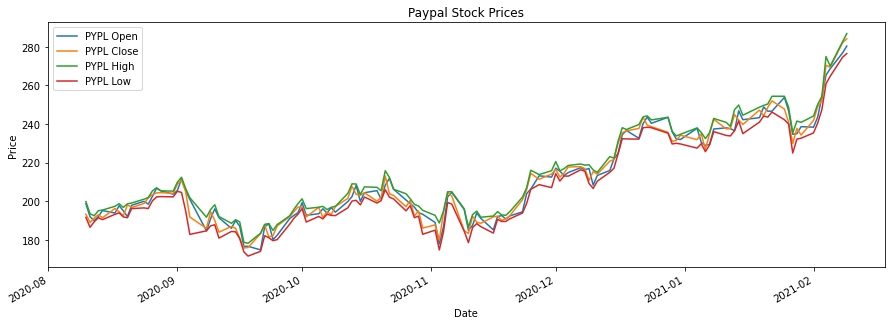

In [188]:
paypal['Open'].plot(label = 'PYPL Open', figsize=(15,5))
paypal['Close'].plot(label = 'PYPL Close')
paypal['High'].plot(label='PYPL High')
paypal['Low'].plot(label='PYPL Low')
plt.legend()
plt.title('Paypal Stock Prices')
plt.ylabel('Price')
plt.show()

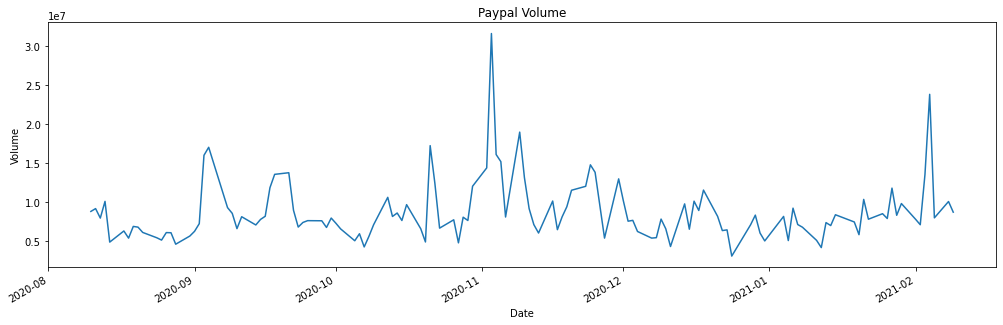

In [189]:
paypal['Volume'].plot(figsize=(17,5))
plt.title('Paypal Volume')
plt.ylabel('Volume')
plt.show()

In [190]:
square = web.DataReader('SQ', 'yahoo', start, end)

In [191]:
paypal.to_csv('paypal.csv')
square.to_csv('square.csv')

In [192]:
square.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-03,234.570007,221.880005,228.500000,227.940002,5193400,227.940002
2021-02-04,239.309998,231.070007,233.529999,237.720001,8893400,237.720001
2021-02-05,240.570007,235.270004,238.000000,240.380005,5077600,240.380005
2021-02-08,264.266998,244.000000,245.080002,259.970001,17114900,259.970001
2021-02-09,262.570007,250.550003,256.579987,258.119995,10299119,258.119995


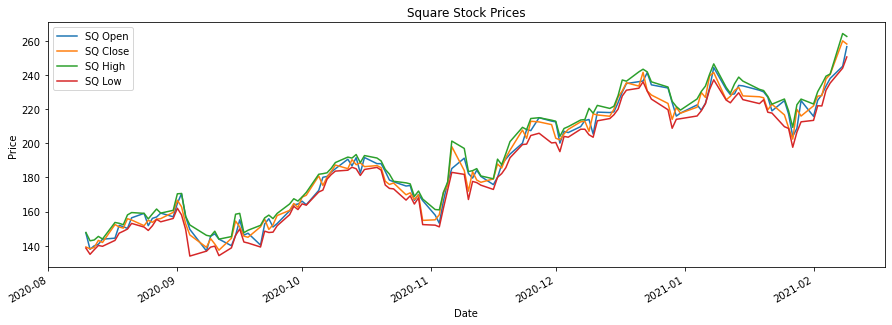

In [193]:
square['Open'].plot(label = 'SQ Open', figsize=(15,5))
square['Close'].plot(label = 'SQ Close')
square['High'].plot(label='SQ High')
square['Low'].plot(label='SQ Low')
plt.legend()
plt.title('Square Stock Prices')
plt.ylabel('Price')
plt.show()

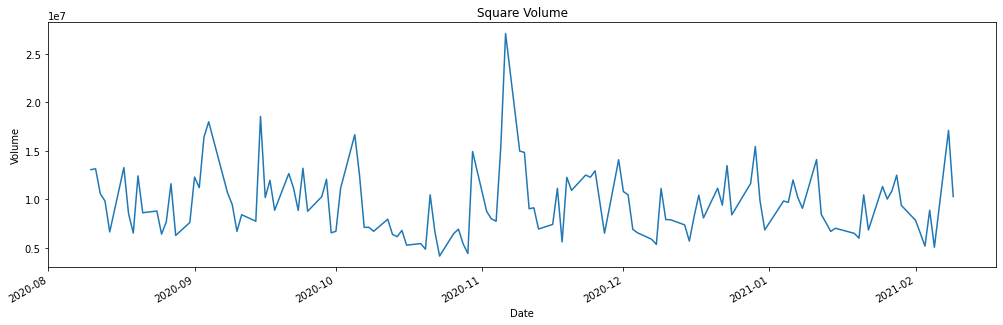

In [194]:
square['Volume'].plot(figsize=(17,5))
plt.title('Square Volume')
plt.ylabel('Volume')
plt.show()

# Comparing PayPal to Square: Stock Price and Volume

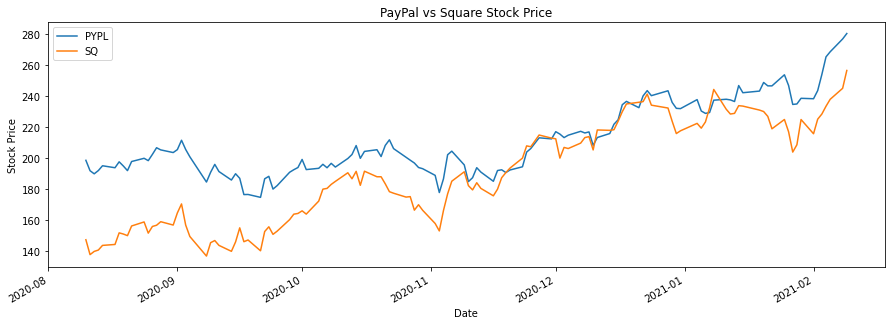

In [195]:
paypal['Open'].plot(label='PYPL', figsize=(15,5))
square['Open'].plot(label='SQ')
plt.ylabel("Stock Price")
plt.title('PayPal vs Square Stock Price')
plt.legend()

Text(0, 0.5, 'Volume')

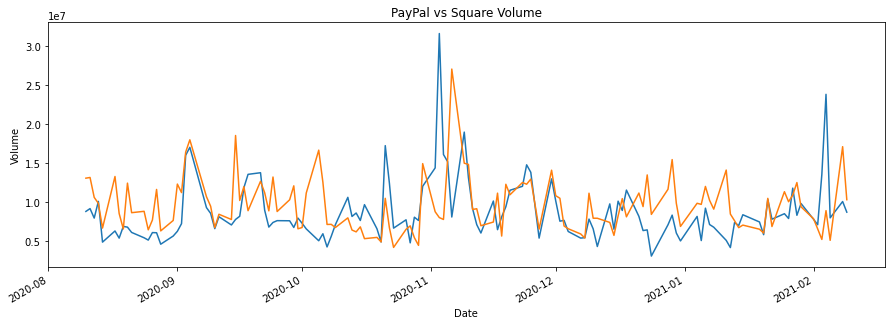

In [196]:
paypal['Volume'].plot(label='PYPL', figsize=(15,5))
square['Volume'].plot(label='SQ')
plt.title('PayPal vs Square Volume')
plt.ylabel('Volume')

In [197]:
# Highest volume date
paypal.iloc[[paypal['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-03,188.75,174.809998,177.940002,179.809998,31656000,179.809998


In [198]:

square.iloc[[square['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-06,201.330002,182.990005,185.240005,198.080002,27088300,198.080002


In [199]:
# Stock prices of both companies look very similar. We will confirm a relationship later on in this analysis

#  Comparing PayPal to Square: Moving Average

Text(0.5, 1.0, 'Paypal Moving Average')

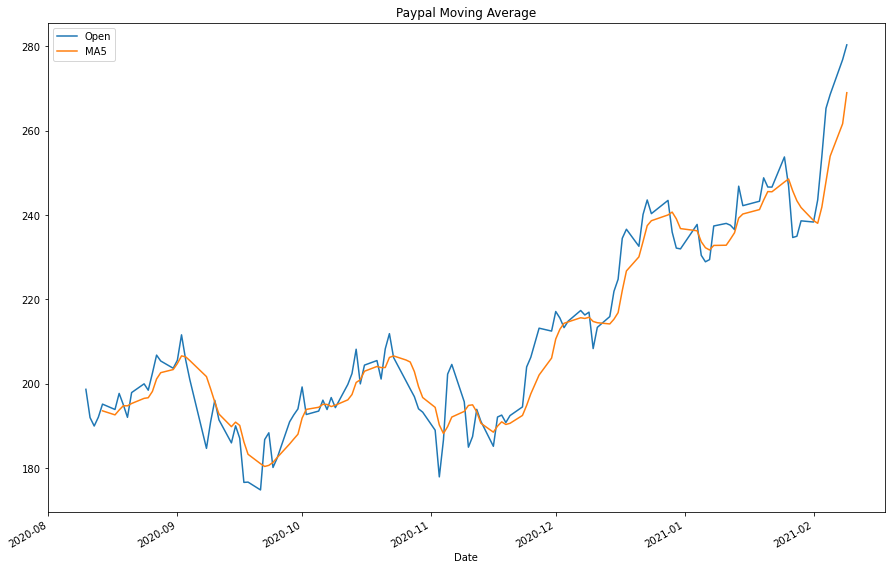

In [200]:
paypal['Open'].plot(label='Open', figsize=(15,10))
paypal['MA5'] = paypal['Open'].rolling(5).mean()
paypal['MA5'].plot(label='MA5') 
plt.legend()
plt.title('Paypal Moving Average')

Text(0.5, 1.0, 'Square Moving Average')

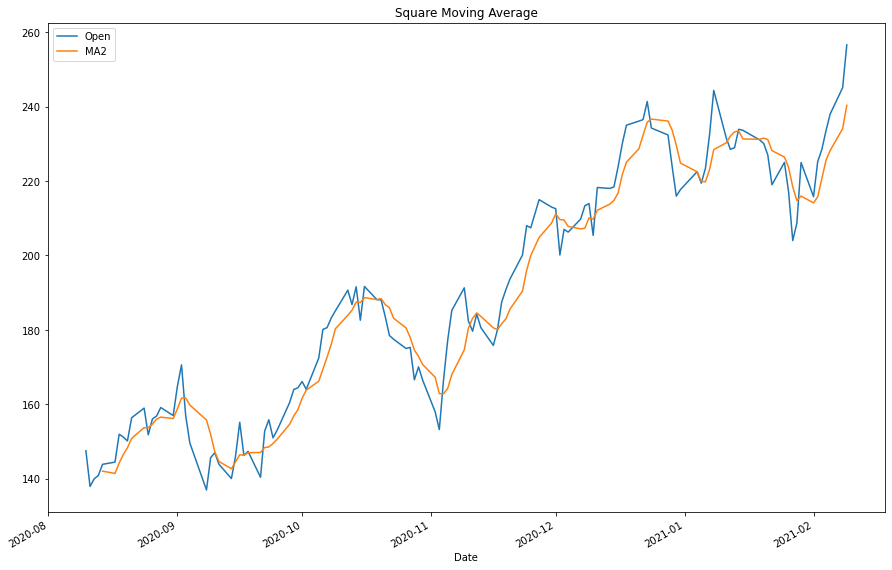

In [201]:
square['Open'].plot(label='Open', figsize=(15,10))
square['MA5'] = square['Open'].rolling(5).mean()
square['MA5'].plot(label='MA2')
plt.legend()
plt.title('Square Moving Average')

In [202]:
# Even their moving averages look very similar and are equally as smooth

# Correlation between PayPal and Square

In [203]:
payment_industry = pd.concat([paypal['Open'], square['Open']], axis=1)
payment_industry.columns = ['Paypal Open', 'Square Open']

array([[<AxesSubplot:xlabel='Paypal Open', ylabel='Paypal Open'>,
        <AxesSubplot:xlabel='Square Open', ylabel='Paypal Open'>],
       [<AxesSubplot:xlabel='Paypal Open', ylabel='Square Open'>,
        <AxesSubplot:xlabel='Square Open', ylabel='Square Open'>]],
      dtype=object)

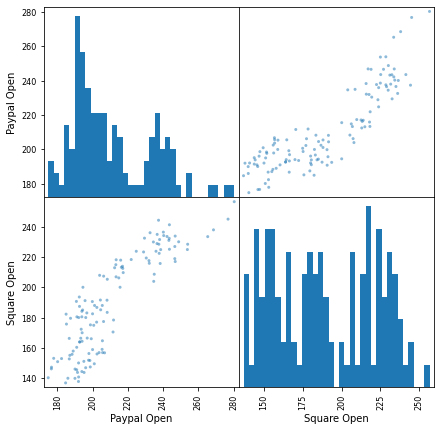

In [204]:
scatter_matrix(payment_industry, figsize=(7,7), hist_kwds={'bins':35})

In [219]:
# From this matrix we can see that as Paypal stock gets higher so does Square stock, vice versa.

# Daily Percentage Change

In [206]:
paypal['Returns'] = (paypal['Close']/paypal['Close'].shift(1)) - 1 

In [207]:
paypal.head()

,High,Low,Open,Close,Volume,Adj Close,MA5,Returns
Date,,,,,,,,
2020-08-10,199.850006,191.690002,198.699997,193.320007,8792200,193.320007,NaN,NaN
2020-08-11,193.535004,186.520004,192.000000,189.029999,9155300,189.029999,NaN,-0.022191
2020-08-12,192.509995,189.399994,190.000000,191.320007,7936600,191.320007,NaN,0.012115
2020-08-13,195.130005,191.479996,192.100006,193.070007,10082400,193.070007,NaN,0.009147
2020-08-14,195.468994,190.509995,195.190002,191.460007,4848000,191.460007,193.598001,-0.008339


In [208]:
square['Returns'] = (square['Close']/square['Close'].shift(1)) - 1 

In [209]:
square.head()

,High,Low,Open,Close,Volume,Adj Close,MA5,Returns
Date,,,,,,,,
2020-08-10,147.820007,138.660004,147.529999,139.339996,13066300,139.339996,NaN,NaN
2020-08-11,142.947998,135.029999,137.940002,138.250000,13157100,138.250000,NaN,-0.007823
2020-08-12,143.419998,137.690002,140.009995,139.020004,10596900,139.020004,NaN,0.005570
2020-08-13,145.509995,140.199997,140.899994,143.190002,9835000,143.190002,NaN,0.029996
2020-08-14,144.000000,139.729996,143.889999,141.960007,6654700,141.960007,142.053998,-0.008590


Text(0.5, 1.0, 'Returns')

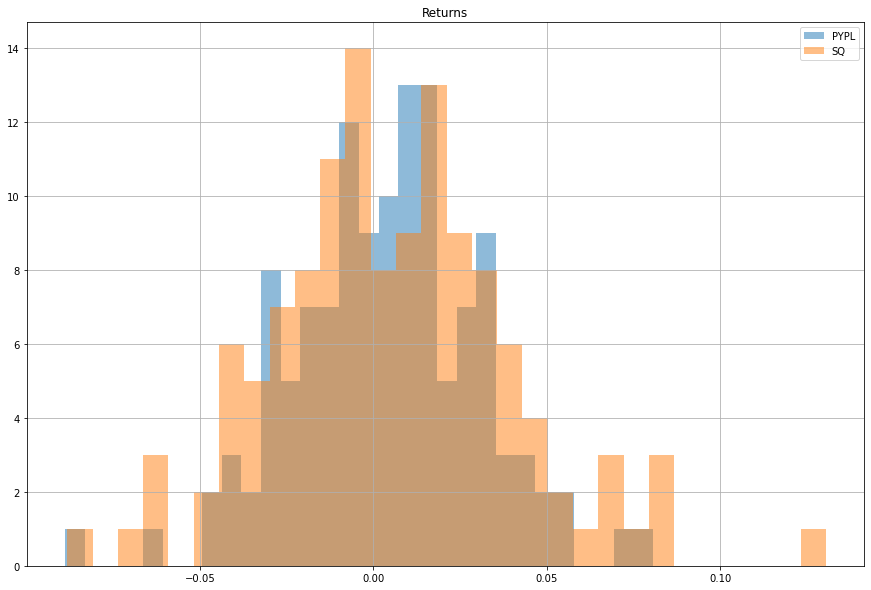

In [210]:
paypal['Returns'].hist(bins=30, label='PYPL', alpha= 0.5, figsize=(15,10))
square['Returns'].hist(bins=30, label='SQ', alpha=0.5)
plt.legend()
plt.title('Returns')

Text(0.5, 1.0, 'Normalized Returns')

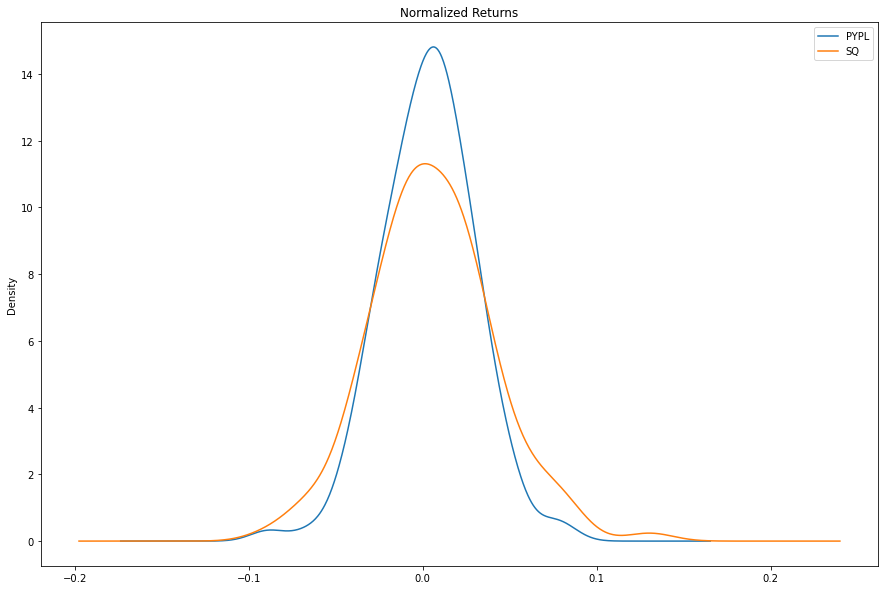

In [211]:
paypal['Returns'].plot(kind='kde', label='PYPL', figsize=(15,10))
square['Returns'].plot(kind='kde', label='SQ')
plt.legend()
plt.title('Normalized Returns')

<AxesSubplot:>

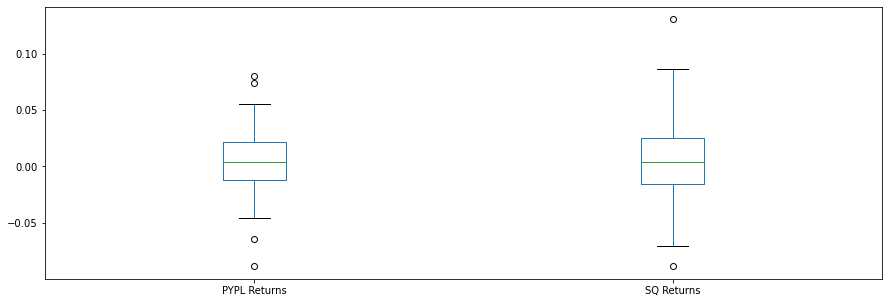

In [212]:
box_df = pd.concat([paypal['Returns'], square['Returns']], axis=1)
box_df.columns = ['PYPL Returns', 'SQ Returns']
box_df.plot(kind='box', figsize=(15,5))

array([[<AxesSubplot:xlabel='PYPL Returns', ylabel='PYPL Returns'>,
        <AxesSubplot:xlabel='SQ Returns', ylabel='PYPL Returns'>],
       [<AxesSubplot:xlabel='PYPL Returns', ylabel='SQ Returns'>,
        <AxesSubplot:xlabel='SQ Returns', ylabel='SQ Returns'>]],
      dtype=object)

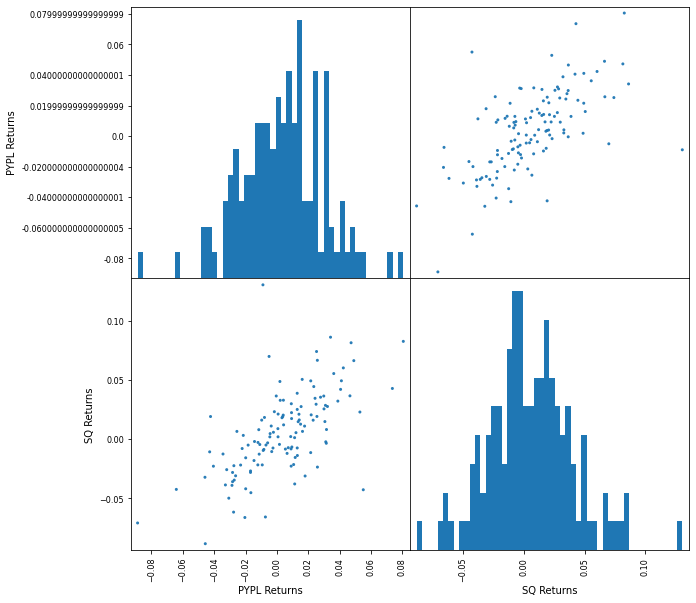

In [213]:
scatter_matrix(box_df, figsize=(10,10), hist_kwds={'bins':50}, alpha=0.95)

# Cumulative Return

In [214]:
paypal['Cumulative Return'] = (1+paypal['Returns']).cumprod()
square['Cumulative Return'] = (1+square['Returns']).cumprod()

In [215]:
paypal.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5,Returns,Cumulative Return
Date,,,,,,,,,
2021-02-03,254.315002,247.389999,253.960007,251.899994,13545700,251.899994,241.917999,0.011240,1.303021
2021-02-04,274.940002,260.850006,265.339996,270.429993,23840900,270.429993,247.985999,0.073561,1.398872
2021-02-05,270.000000,264.709991,268.609985,269.440002,7967200,269.440002,253.977997,-0.003661,1.393751
2021-02-08,282.699005,274.623993,276.880005,282.170013,10065500,282.170013,261.679999,0.047246,1.459601
2021-02-09,286.869995,276.510010,280.380005,284.200012,8696995,284.200012,269.034000,0.007194,1.470101


In [216]:
square.tail()

,High,Low,Open,Close,Volume,Adj Close,MA5,Returns,Cumulative Return
Date,,,,,,,,,
2021-02-03,234.570007,221.880005,228.500000,227.940002,5193400,227.940002,220.638000,0.001362,1.635855
2021-02-04,239.309998,231.070007,233.529999,237.720001,8893400,237.720001,225.600000,0.042906,1.706043
2021-02-05,240.570007,235.270004,238.000000,240.380005,5077600,240.380005,228.206000,0.011190,1.725133
2021-02-08,264.266998,244.000000,245.080002,259.970001,17114900,259.970001,234.060001,0.081496,1.865724
2021-02-09,262.570007,250.550003,256.579987,258.119995,10299119,258.119995,240.337997,-0.007116,1.852447


Text(0.5, 1.0, 'PYPL vs SQ Cumulative Returns for 6 Months')

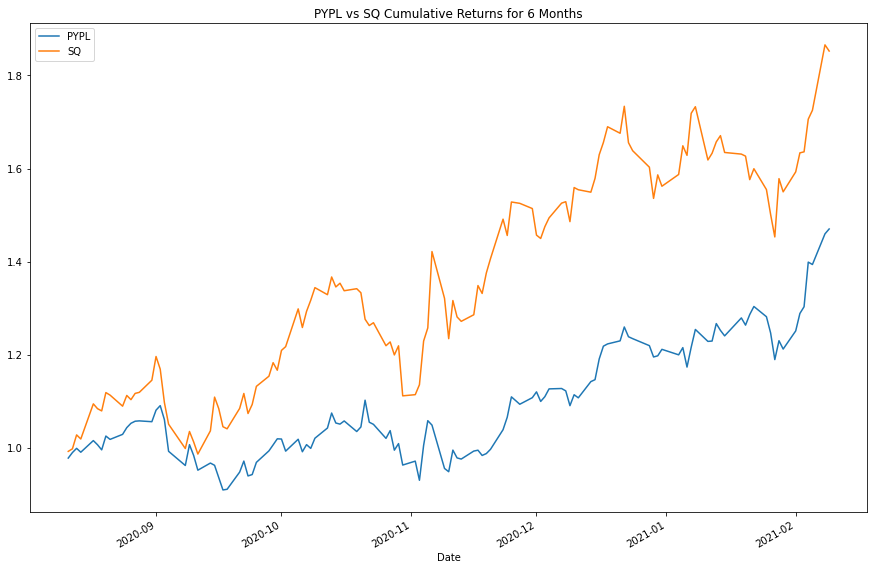

In [217]:
paypal['Cumulative Return'].plot(label='PYPL', figsize=(15,10))
square['Cumulative Return'].plot(label='SQ')
plt.legend()
plt.title('PYPL vs SQ Cumulative Returns for 6 Months')

In [218]:
# Square has had a higher cumulative return over PayPal. Squares cumulative return is 85% and PayPals is 47%. 

# Summary: PayPal and Square are very similar stocks as seen by this analysis. This is because they make similar actions as corporations. They both are heavily invested in cryptocurrency. They have similar mobile apps (Venmo and CashApp). They both seen tremendous growth over the past 6 months. However, Square has almost doubled PayPals cumulative return in this time period